Text(0, 0.5, 'Total Psilocin Blood Level (Grams)')

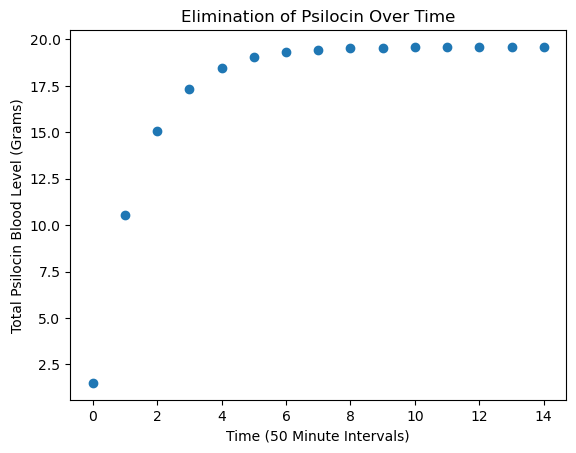

In [4]:
import numpy as np
import matplotlib.pyplot as plt

r=0.5 #Defining the rate of elimination
m0=1.5 #Initial dosage

def elimination_update(x,rate=r): #Defining the updating function
        return r*x+9.8 #Second term is d, additional dosage per time interval 50 minutes

values=[m0] #Starting value

for i in range(14): 
        values.append(elimination_update(values[i]))  #Creating the values of psilocin in the body over time
        if values[i] <= 0.1: #Testing to determine when psilocin levels dip below 0.1 grams
            print([i], values[i]) #Outputting the time at which this occurs, and the psilocin level at that time
            break #Stopping the loop from iterating after psilocin levels of less than or equal to 0.1 grams are reached
        
#plotting the graph and adding titles:    
plt.scatter(list(range(14+1)),values)
plt.title("Elimination of Psilocin Over Time")
plt.xlabel("Time (50 Minute Intervals)")
plt.ylabel("Total Psilocin Blood Level (Grams)")


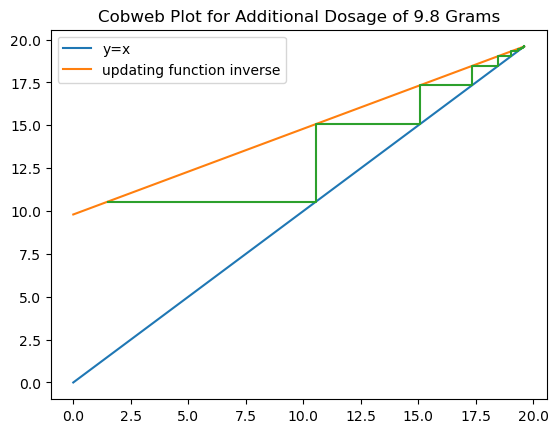

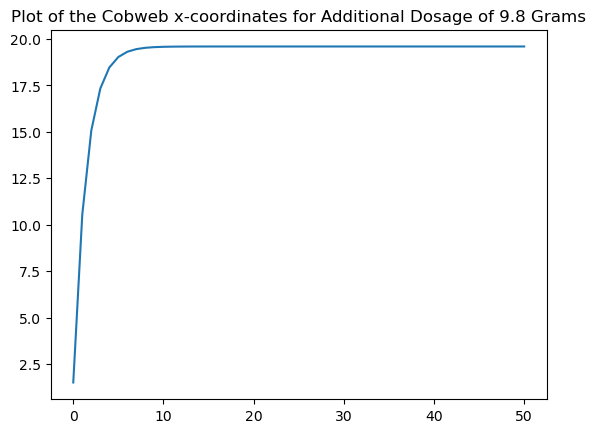

In [3]:
r=0.5 #elimination rate
m0=1.5 #initial dosage of psilocin 
def elimination_update(x,rate=r): #defining the updating function
    return r*x+9.8 #second term is d, additional dosage per time interval 50 minutes
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
def plot_cobweb(f, m_0, steps): #function to cobweb
    cobwebs_x=[m_0] #starting x-value
    cobwebs_y=[f(m_0)] #starting y-value
    for i in range(1,steps):
        if i%2==1: #if the step i is odd
            cobwebs_x.append(cobwebs_y[i-1]) #append the same values along the diagonal y=x
            cobwebs_y.append(cobwebs_y[i-1])
        elif i%2==0: #if the step i is even
            cobwebs_x.append(cobwebs_y[i-1]) #append the same x-value, but "move up" to the updating curve. 
            cobwebs_y.append(f(cobwebs_x[i]))
    xvalues=np.linspace(0,max(cobwebs_x), 500) #linspace for plotting
    plt.title("Cobweb Plot for Additional Dosage of 9.8 Grams")
    plt.plot(xvalues,xvalues, label="y=x") #plot the diagonal y=x
    plt.plot(xvalues,f(xvalues),  label="updating function inverse") #plot the updating function
    plt.plot(cobwebs_x,cobwebs_y) #plot the cobwebs
    for x,y in zip(list(np.around(np.array(cobwebs_x),2)),list(np.around(np.array(cobwebs_y),2))): #add some labels
        label = f"({x},{y})"
    plt.legend()
    plt.draw()  
    plt.figure() 
    #get the x-components of the cobwebs to plot the solution. This orders them and deletes repeats:
    distinct_solutions=list(OrderedDict.fromkeys(cobwebs_x))
    plt.title("Plot of the Cobweb x-coordinates for Additional Dosage of 9.8 Grams")
    plt.plot(list(range(len(distinct_solutions))),distinct_solutions) #plots the solution set. 
    plt.draw()
    plt.show()
plot_cobweb(elimination_update, 1.5,100) #plot the cobweb